# Guess the Weight of the Fruitcake

* Phil doesn't own any bathroom scales but would quite like to know how much he weighs. In this project we will use the wisdom of the crowd by asking the AHW2015 class nicely to estimate his height, and then build a model for the system in order to carry out a blind inference of his weight, in pounds.

* Central to this insane methodology is the concept of ["body mass index"](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm), which relates a person's height to their weight via the degree to which they are "overweight". Let's ask people how tall they think Phil is, and also how overweight he is, and then infer his weight.

## Data Collection

If you'd like to contribute an estimate of Phil's height and obesity (plus some auxiliary data), please fill out the form [here](http://goo.gl/forms/a7Pe3bZFrD).

## Data Visualization

* Let's download the form responses, read them in as a Pandas dataframe, and make some plots.

In [1]:
!wget --no-check-certificate -O data.csv "https://docs.google.com/spreadsheets/d/1IMYHSyyDTh-Nf0y_gix0cbseMvep9C5XgItezvqLpRw/export?format=csv"

--2015-09-30 16:24:20--  https://docs.google.com/spreadsheets/d/1IMYHSyyDTh-Nf0y_gix0cbseMvep9C5XgItezvqLpRw/export?format=csv
Resolving docs.google.com... 173.194.208.113, 173.194.208.101, 173.194.208.100, ...
Connecting to docs.google.com|173.194.208.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: 'data.csv'

data.csv                [ <=>                  ]   2.50K  --.-KB/s   in 0.001s 

2015-09-30 16:24:20 (1.90 MB/s) - 'data.csv' saved [2556]



In [2]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Timestamp,What do you think Phil's height is?,Is Phil...,What do you think Phil's age is?,What is your first name?,What is your own height?,What is your own weight?,What is your own age?,Which is the best text editor?
0,9/28/2015 17:32:57,185.0,Just right,40,John,172,148,35,Sublime
1,9/28/2015 17:47:11,195.6,Just right,44,Lia,160,130,31,emacs
2,9/28/2015 17:52:27,185.0,Just right,37,NaN,182,178,28,vim
3,9/28/2015 17:57:23,180.5,Just right,39,Rebecca,161,145,26,SUBLIME OBVIOUSLY
4,9/28/2015 18:02:57,180.0,Just right,40,Somebody,173,220,39,vim


In [4]:
names = data.columns.tolist()
# names[1], names[2], names[3], names[4], names[5], names[6] = "height", "obesity", "age", "ownheight", "ownweight"
names = ("t","height","obesity","age","name","ownheight","ownweight","ownage","editor")
data.columns = names

index = (data['obesity'] == 'Just right')
data['obesity'][index] = 'Normal'

data

/Users/pjm/lsst/DarwinX86/anaconda/2.1.0-4-g35ca374/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,t,height,obesity,age,name,ownheight,ownweight,ownage,editor
0,9/28/2015 17:32:57,185.00,Normal,40,John,172,148,35,Sublime
1,9/28/2015 17:47:11,195.60,Normal,44,Lia,160,130,31,emacs
2,9/28/2015 17:52:27,185.00,Normal,37,NaN,182,178,28,vim
3,9/28/2015 17:57:23,180.50,Normal,39,Rebecca,161,145,26,SUBLIME OBVIOUSLY
4,9/28/2015 18:02:57,180.00,Normal,40,Somebody,173,220,39,vim
5,9/28/2015 18:03:04,171.00,Normal,38,Brendon,170,150,32,gedit
6,9/28/2015 18:03:29,185.00,Normal,41,Simeon,182,120,31,vim
7,9/28/2015 18:04:00,190.00,Normal,40,Abbie,173,157,25,TextWrangler
8,9/28/2015 18:04:06,180.00,Normal,40,Nina,160,121,32,Kate
9,9/28/2015 18:06:35,180.30,Underweight,36,Adam,188,160,31,textmate (?)


In [5]:
import numpy as np
h = np.array(data["height"])
b = np.array(data["obesity"])
ph = np.array(data["ownheight"])
pw = np.array(data["ownweight"])
ph[ph == "1,72"] = 172

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

* What is the distribution of observed heights?

(array([  6.,   2.,   1.,  12.,   3.,   7.,   3.,   3.,   0.,   1.]),
 array([ 170.  ,  172.56,  175.12,  177.68,  180.24,  182.8 ,  185.36,
         187.92,  190.48,  193.04,  195.6 ]),
 <a list of 10 Patch objects>)

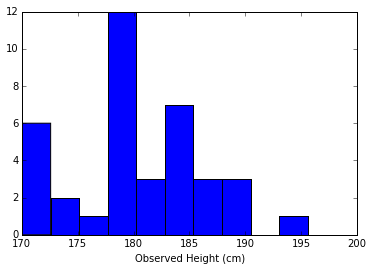

In [7]:
plt.xlabel("Observed Height (cm)")
plt.hist(h)

* Is there a correlation between weight and height in the population of observers?

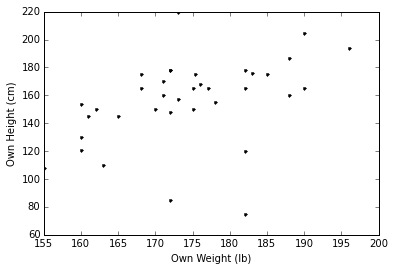

In [8]:
plt.xlabel("Own Weight (lb)")
plt.ylabel("Own Height (cm)")
plt.plot(ph, pw, "k.")

Other things to do:

* Make `cornerplot` of all quantities of interest.

## A First Model

Let's assume:

* Both the height $h^{\rm obs}$ and obesity $b^{\rm obs}$ data are uncertain (and so need sampling distributions assigned to them).


* I have a true height $h$ and true weight $w$ that every *good* person would estimate faithfully, if they could: this means that we don't need any latent variables to describe perceived height and weight that would be distributed with intrinisc scatter across the observers.


* Obesity $b$ is related to BMI via the sampling distribution ${\rm Pr}(b|{\rm BMI}) = U[\alpha,\beta]$, where:

| $\alpha$ | $\beta$ | $b$           |
|----------|---------|---------------|
| 12.1     | 18.5    | "Underweight" |
| 18.5     | 24.9    | "Normal"      |
| 24.9     | 31.4    | "Overweight"  |


* There is a proportion $P_{\rm bad}$ of the observations that are *bad*: these come from uniform random number generators (e.g. in the range $160 < h_k < 200$)


* True BMI is determined by $w$ and $h$ via BMI = $703\,(w/{\rm lbs})\,({\rm inches}/h)$

### PGM

Let's draw the PGM with `daft`.

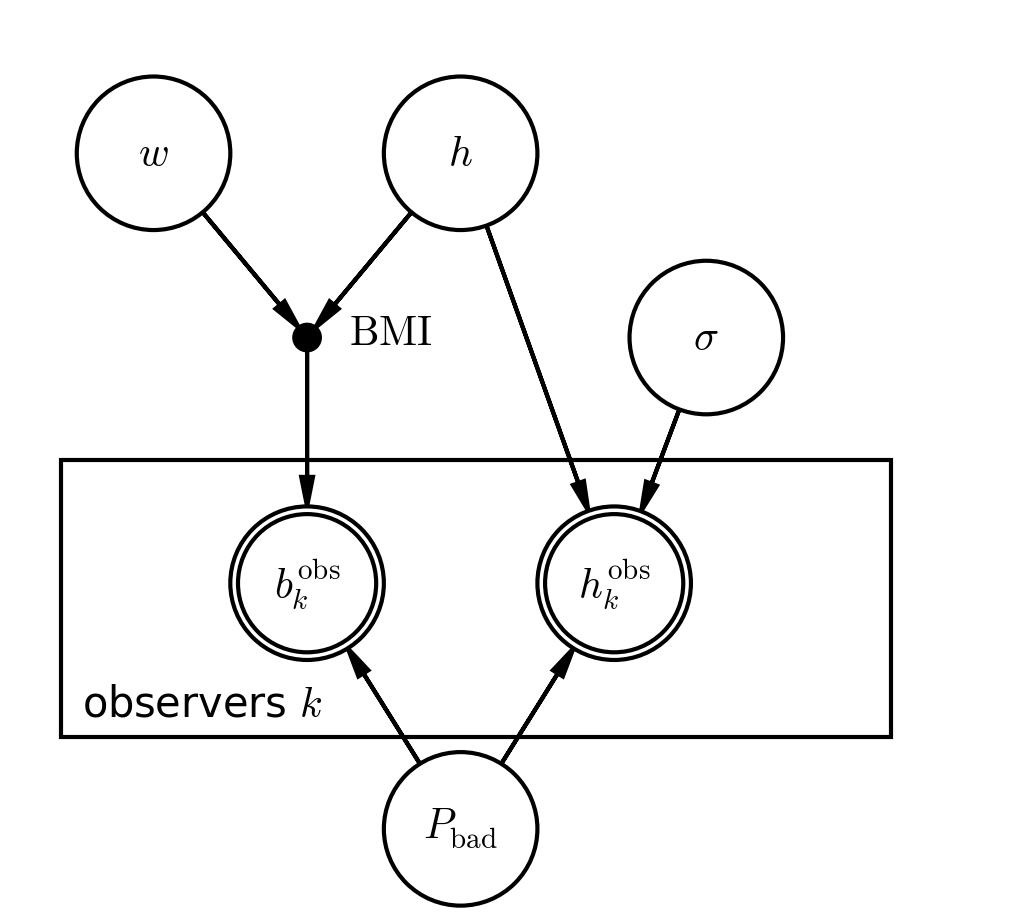

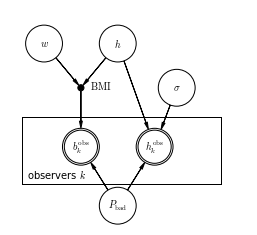

In [18]:
import fruitcake_pgm
fruitcake_pgm.draw()

from IPython.display import Image
Image("fruitcake_pgm.png")

In [ ]:
ph, pw = list(ph), list(pw)
ph.pop(15)
ph.pop(18)
pw.pop(15)
pw.pop(18)

ph, pw = np.array(ph), np.array(pw)
print len(ph), len(pw)

AT = np.vstack((pw, np.ones(len(pw))))
ATA = np.dot(AT, AT.T)
m, c = np.linalg.solve(ATA, np.dot(AT, ph))